# Introduction 

You may or may not have heard of the Yakuza series, but you might have seen this meme floating around on the internet : https://www.youtube.com/watch?v=pN2cFvxj52k&list=PL9Tvi-yFWi62CflY1lg0j7aZDOzuXGnho&index=13&t=0s. The song in particular, that was playing over the deepfaked silhouettes, was from a very well-received game called Yakuza 0, which belongs to the Yakuza games franchise. The name of the song is 'Baka Mitai' or 'I've been a fool'. 

Yakuza 0 is an open-world action beat-em-up that takes place in 80s Japan. Now, what does this have to do with text analysis ? Well, I wanted to analyze all of the Steam reviews of the game and find out what makes this game deserve the 'Overwhelmingly Positive' rating on the Steam platform. Also, it's kinda fun to dig into this sort of thing and learn something new. The analysis here won't be very indepth and I'll try to keep it as simple as possible, so get ready.

# Data Gathering

In order to gather all the reviews on Steam, they're all collected through web scraping, which involes looking at the website's HTML code and find which text or table of text to gather. Now, depending on the website, it can range from very easy to a very painful session. Luckily, there's a Python library that can help us with that : https://pypi.org/project/steamreviews/

With this library, we can just import it, add the required Steam product ID, call the required function and it outputs a JSON file that contains all the information of the Steam reviews. Very helpful. With our data collected, we filter out what JSON object we need to use in order to extract our data. So, that would be the 'review','voted_up' (which just shows whether it's recommended or not). Filter the data and pack it, into one single .csv file.

In [ ]:
import steamreviews

review_dict,query_count = steamreviews.download_reviews_for_app_id(638970)
print(review_dict,query_count)

In [ ]:
import json
import pandas as pd

f = open(r'insert directory link to json file')

data = json.load(f)
data = data['reviews']

review_dataset = []

for id,info in data.items():

    review = {'Steam ID':id,
              'Review':info['review'],
              'Language':info['language'],
              'Recommended':info['voted_up']}
    
    review_dataset.append(review)

d = json.dumps(review_dataset,indent=4)

df = pd.read_json(d)
df.to_csv('reviews.csv',index=False,encoding='utf-8')

Now comes the main part

In [77]:
# Basic libraries
import pandas as pd
import matplotlib.pyplot as pypl
import seaborn as sd
import numpy as np

# For text cleaning 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

First thing to do is to load in the dataset using Pandas, a Python library used for manipulating data easily. Since most of the reviews we're dealing with, are in English, we'll filter out the other languages. The thing about Steam reviews is that they aren't the best 'reviews' per say, as some or most of it is just shitposting but informative shitposting.

In [78]:
text_df = pd.read_csv('reviews.csv')

text_df.sample(10)

,Steam ID,Review,Language,Recommended
9157,56284714,perfect start to learn more about this japan s...,english,True
2942,69894342,The most basic comparison of Yakuza 0 is basic...,english,True
22773,43875065,Yakuza on pc? That's rad,english,True
728,73338276,rad,english,True
17419,45720354,ดีเยี่ยมสนุก,thai,True
17388,45757138,after spends enjoyable 90hrs of playing and ho...,english,True
11888,52060272,I cept being recommended this game and would j...,english,True
12668,51102808,"Trash, like all Japanese games",english,False
21503,43900623,great game. yakuza is one of sega's series tha...,english,True
19145,44356953,Amazing game. An absolute steal at $20.,english,True


In [79]:
text_df = text_df[text_df['Language']=='english']
text_df = text_df.drop(['Steam ID'],axis=1)

In [80]:
text_df.sample(10)

,Review,Language,Recommended
13779,+ great story\n- terrible port\n- no autosave\...,english,False
18030,"Absolutely amazing game, I wish I'd got into t...",english,True
16687,I haven't yet played the whole game.\n\n\nI bo...,english,True
2546,ONE OF THE BEST GAME I'VE EVER PLAYED\n\n\nWhe...,english,True
12875,Cutscene keep crashing my game. Please fix thi...,english,True
18371,A great game with a lot of content if you can ...,english,True
5192,I saw this game and the 2 other Yakuza games f...,english,True
22391,It is truly an honor to play a Ryu Ga Gotoku t...,english,True
11012,These games are without a doubt my favorite se...,english,True
8823,I've never played or even knew about the Yakuz...,english,True


# Basic Data Analysis

Looking at the number of reviews that have recommended the game or not, we see that the amount of users who have recommended the game overshadow those who don't recommend it. Now keep this one in mind, the amount of reviews recommending the game does indicate something about the game itself and how we're going to see the reasons behind the recommendation

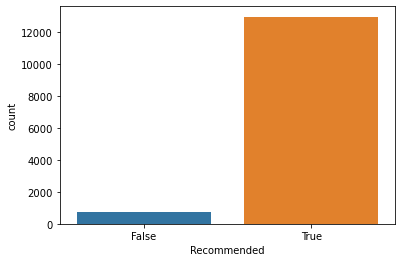

In [81]:
sd.countplot('Recommended',data=text_df)

In [82]:
strs = 'What the fuck ?'

Let's analyze the word count for each review. For that, a new column containing the word count for each review is made and the dataset is split into Recommended and Not Recommended. Looking at the histograms of the word counts for each class, we see a common observation : Most of the reviews contain word counts that are 400 or less than 400. That's pretty normal for a Steam review count to have. 

In [83]:
text_df['Review'] = text_df['Review'].astype(str)
text_df['Length'] = text_df['Review'].apply(lambda x : len(x.split()))

In [84]:
recc_length = text_df[text_df['Recommended'] == True]
norecc_length = text_df[text_df['Recommended'] == False]

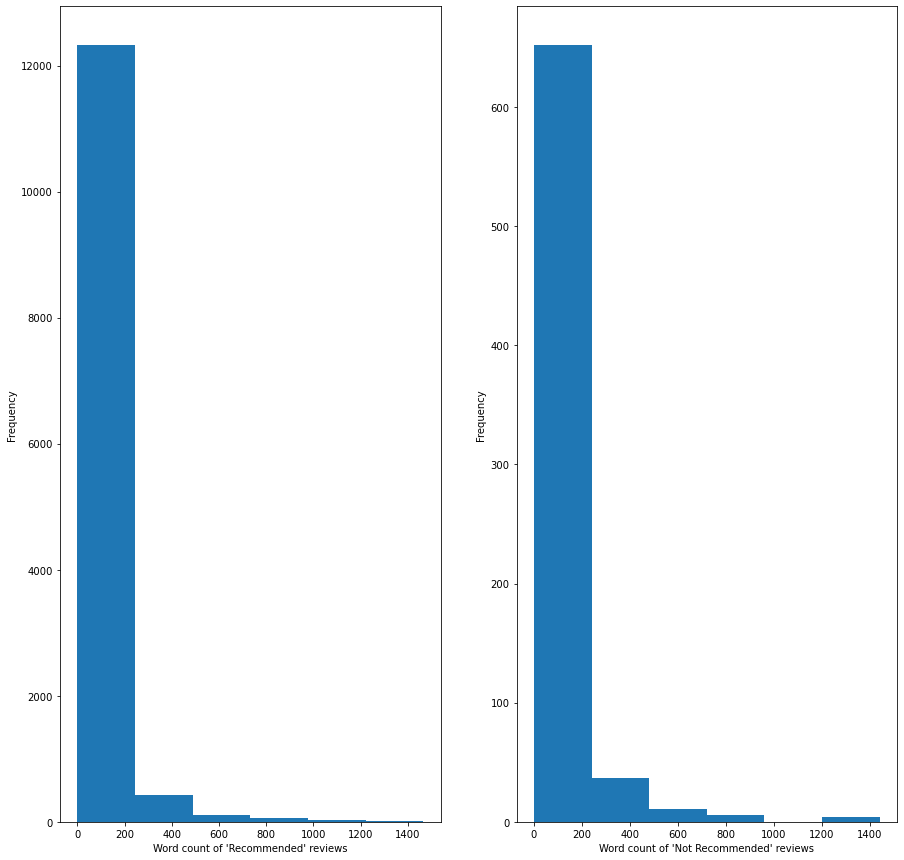

In [121]:
fig, (ax1,ax2) = pypl.subplots(1,2,figsize=(18,9))

ax1.hist(recc_length['Length'].values,bins=6)
ax1.set(xlabel='Word count of \'Recommended\' reviews',ylabel='Frequency')
ax2.hist(norecc_length['Length'].values,bins=6)
ax2.set(xlabel='Word count of \'Not Recommended\' reviews',ylabel='Frequency')
pypl.show()

# Data Cleaning

Before we go on and analyze further, we need to clean out our dataset, so that we can get a clearer picture of what the reviews are saying. Here's how it goes :

1. Uncontract any words to their full form : This usually makes it easier to clean text data and is an optional step. Examples are words like ain't or we'll, which is converted into 'is not' or 'we will'

2. Remove any stopwords : These are words that do not provide any sort of information to what we're trying to find or just appear way too frequently. Articles and preposition are examples of stopwords.

3. Punctuations, emojis and emoticons,numbers : They're not words,so it's best to remove them.

4. Parts-of-speech : These are tags that indicate the position of the word in the sentence, whether they're a noun, verb, preposition etc.

5. Lemmatization : It's a technique or method where the words are converted back into their root or base form, such as converting the word 'confusing' to the base form 'confused'. Makes it easier to understand the words for analysis. The POS tag is also used to lemmatize the words based on their position.

In [86]:
text_df.head(10)

,Review,Language,Recommended,Length
0,This game man... I honestly would say this is ...,english,True,336
1,Good Game,english,True,2
2,I downloaded this for the baka mitai but the f...,english,True,12
4,KIRYU-CHAN!!!,english,True,1
5,I-It's not like I'm happy to see you or anything!,english,True,10
6,One of the best games of all time. Worth a pla...,english,True,13
7,I could've been a Yakuza If not because of Sek...,english,True,10
8,"Great game, finally picked it up after they re...",english,True,36
9,Its fantastic. I literally paused the story to...,english,True,43
10,I have never played a Yakuza game before but I...,english,True,92


In [87]:
import string

contract = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

stopword = stopwords.words('english')
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def penntag(pen):
    morphy_tag = {'NN': 'n', 'JJ': 'a',
                  'VB': 'v', 'RB': 'r'}
    try:
        return morphy_tag[pen[:2]]
    except:
        return 'n'


def comment_cleaner(comm):
    temp_comm = []
    megos = ' '

    # Uncontract any contracted words in our sentences
    uncontracted = ' '.join([contract[word] if word in contract else word for word in comm.lower().split()])

    # Remove any stopwords in our sentences
    stopwords_removed = [word for word in uncontracted.lower().split() if word not in stopword]

    # Use parts-of-speech to regain context after lemmatization 
    POS_words = nltk.pos_tag(stopwords_removed)

    for i in range(0, len(POS_words)):

        # Lemmatize words based on whether they are a noun, preposition etc. based on position
        lemmas = lemma.lemmatize(POS_words[i][0], pos=penntag(POS_words[i][1]))

        # Append or join the words together
        temp_comm.append(lemmas)
    
    # Combine the words into a sentence
    megos = ' '.join(word for word in temp_comm)
    return megos

In [88]:
# replace everything except for word charaters and whitespaces with 1 whitespace
text_df['Review'] = text_df['Review'].str.replace('[^\w\s]',' ')
# replace numbers with single whitespace
text_df['Review'] = text_df['Review'].str.replace('[\d+]',' ')
text_df['Review'] = text_df['Review'].str.replace('(^| ).(( ).)*( |$)',' ')
text_df['Review'] = text_df['Review'].apply(lambda r : comment_cleaner(r))

In [89]:
text_df.head(10)

,Review,Language,Recommended,Length
0,game man honestly would say favorite game time...,english,True,336
1,good game,english,True,2
2,download baka mitai fun keep go,english,True,12
4,kiryu chan,english,True,1
5,like happy see anything,english,True,10
6,one best game time worth play anyone,english,True,13
7,could yakuza sekiro,english,True,10
8,great game finally pick remove denuvo look pos...,english,True,36
9,fantastic literally pause story play literal c...,english,True,43
10,never play yakuza game play development team g...,english,True,92


In [13]:
recc_df = text_df[text_df['Recommended']==True]
notrecc_df = text_df[text_df['Recommended']==False]

CountVectorizer goes through every review and records a count of all the words or pair of words in all of the reviews. Usually, a unigram or one word is used for the type of word to be counted, but I prefer bi-gram or 2 word pair, since it gives a better context and meaning.

Let's split the dataset into 2 classes : Recommended and not Recommended and plot out the most common pair of words in each class. Now, there are some words that occur way too frequently in the reviews, such that the context gets lost, so it's best to filter them out.

In [14]:
count_vect = CountVectorizer(ngram_range=(2,2),stop_words=['game','td','tr']).fit(text_df['Review'])

In [96]:
def plot_common_ngrams(texts):

    words = count_vect.transform(texts)
    sum_words = words.sum(axis=0)

    ngram_count = []

    for word,index in count_vect.vocabulary_.items():
        ngram_count.append((word,sum_words[0,index]))

    sorted_ngram_count = sorted(ngram_count,key=lambda x: x[1],reverse=True)

    sorted_ngram_count = sorted_ngram_count[:30]

    x = []
    y = []

    for i in sorted_ngram_count:
        x.append(i[0])
        y.append(i[1])

    fig = pypl.figure(figsize=(15,15))
    pypl.barh(x,y)
    fig.gca().invert_yaxis()
    return fig

This graph tells us what's the most common word pair in all the reviews. As evident from the graph, lots of players really loved the main story and the side quest, open world the game takes place in. The mini-games such as the real estate and cabaret club (which are related to the main story and I don't really want to spoil it) also have a very positive reception. It's one of the first games in the series to be ported to the PC platform. The voice acting, combat mechanics and the characters are really popular among the reviews that recommended the game. There are also mentions of the game's two main characters : Kazuma Kiryu and Goro Majima.

C:\Users\clavi\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


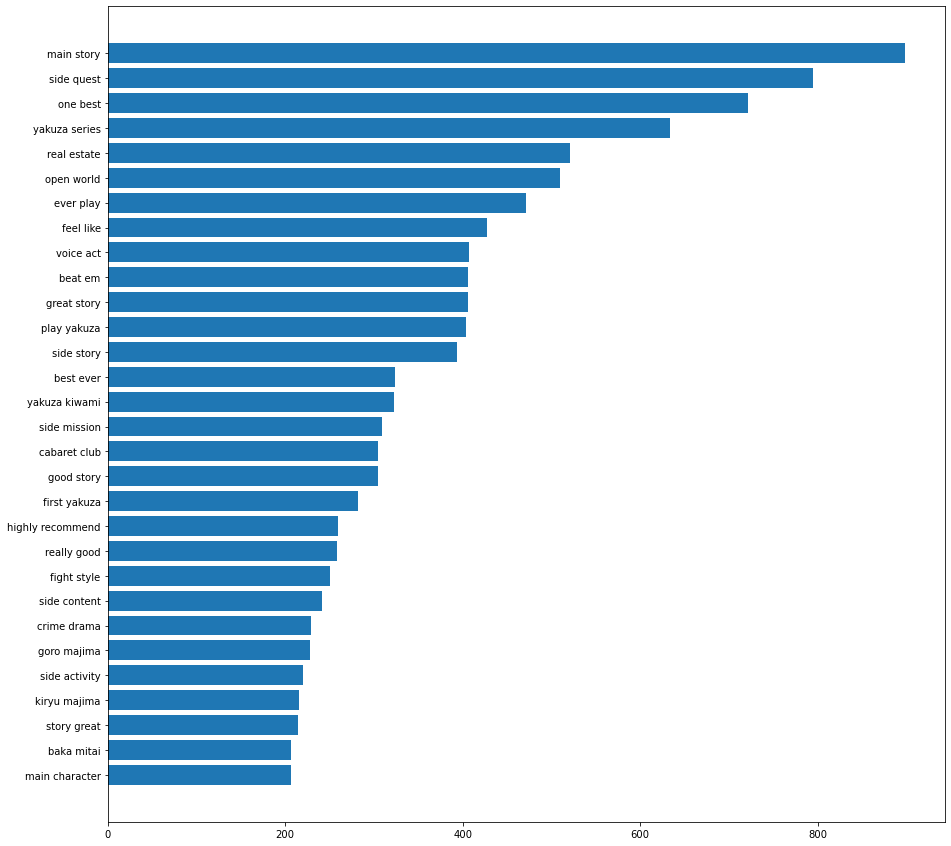

In [97]:
pos_plot = plot_common_ngrams(recc_df['Review'])
pos_plot.show()

As I said before, the amount of negative reviews are tiny compared to the amount of positive reviews. The word frequency would be smaller. Looking at the graph, most of the common words tend to be related to the bugs or glitches they encounted in the game as well as some usere complaining about the lack of an auto-save feature. There are even problems of the game crashing. Some users compared it to another game 'Sleeping Dogs' as well as having complaints of the cut-scenes,combat system etc.

C:\Users\clavi\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


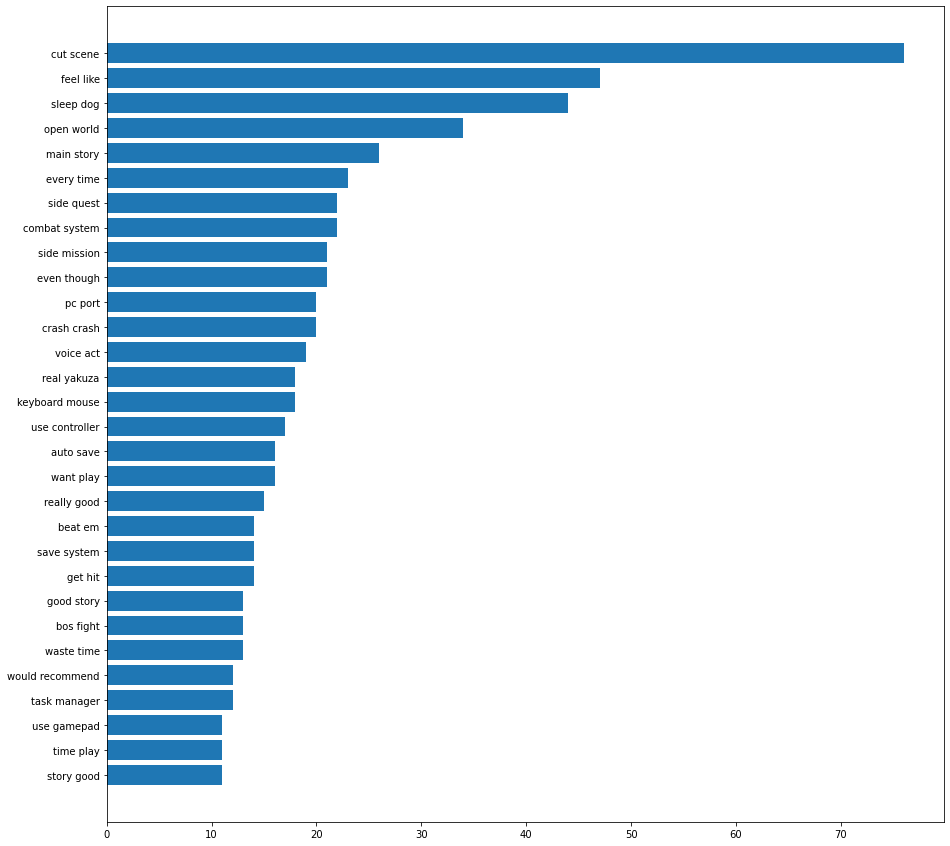

In [98]:
neg_plot = plot_common_ngrams(notrecc_df['Review'])
neg_plot.show()

# Tf-Idf modeling

Simply put, TF-IDF or Term Frequency–Inverse Document Frequency, tells us how important a word or pair of words are more important than others, from all the reviews. The more frequent the word is in every document, the lesser the TF-IDF score. Higher the score, more important is the word. 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
tfvec = TfidfVectorizer(ngram_range=(2,2),stop_words=['game','tr','td'],max_df=0.9,use_idf=True)
tfvec.fit(text_df['Review'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.9, max_features=None,
                min_df=1, ngram_range=(2, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=['game', 'tr', 'td'],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

From the negative reviews, there seems to be more emphasis on how similar it is to 'Sleeping Dogs',another unrelated open world game that takes place in Hong Kong. There's also complaints of the combat system being shallow etc.

In [56]:
mx = tfvec.transform(notrecc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

,tfidf
sleep dog,0.125588
combat system,0.079640
dog unlike,0.075273
person bring,0.075273
super impressive,0.075273
main strategy,0.075273
office main,0.075273
similar combat,0.075273
similarly sleep,0.075273
shallow fight,0.075273


As for the positive reviews, the reactions to the game are positive, with words indicating to that, such as 'favourite time', 'serious ever', 'underrated really. 

In [57]:
mx = tfvec.transform(recc_df['Review'])
fv_tfidf = mx[0]
pdf = pd.DataFrame(fv_tfidf.T.todense(),index=tfvec.get_feature_names(),columns=['tfidf'])
pdf.sort_values(by=["tfidf"],ascending=False)[:15]

,tfidf
serious ever,0.181645
probably one,0.131245
ever play,0.126597
favorite time,0.125937
underrated really,0.094730
one talk,0.094730
ups much,0.094730
everyone one,0.094730
gun almost,0.094730
porn man,0.094730


# Topic Modelling

And finally, we come to topic modelling. Topic modelling is where a given number of topics is made, with each topic having words that occur together in the reviews. Latent Dirichlet Allocation or LDA, is one such algorithm used in topic modelling. It computes the probability of the words that appear together in each review. The reason for topic modelling is just to find out what words do occur the most and gives us a better idea of all the reviews.

In [103]:
from sklearn.decomposition import LatentDirichletAllocation

In [117]:
lda = LatentDirichletAllocation(n_components=10)
lda_count = count_vect.fit_transform(recc_df['Review'])

lda.fit_transform(lda_count)

array([[0.00073541, 0.00073537, 0.00073538, ..., 0.0007354 , 0.00073536,
        0.0007354 ],
       [0.1       , 0.1       , 0.1       , ..., 0.1       , 0.1       ,
        0.1       ],
       [0.01666677, 0.01666844, 0.01666771, ..., 0.69088029, 0.17577931,
        0.01666715],
       ...,
       [0.00909166, 0.0090922 , 0.00909187, ..., 0.00909114, 0.00909235,
        0.0090925 ],
       [0.01111301, 0.01111209, 0.01111233, ..., 0.01111214, 0.01111198,
        0.01111161],
       [0.05      , 0.05      , 0.55      , ..., 0.05      , 0.05      ,
        0.05      ]])

In [118]:
topic_arr = []

def print_topics(model, vectorizer, top_n=10):
     for idx, topic in enumerate(model.components_):
         temps = []
         for i in topic.argsort()[:-top_n-1:-1]:    
               temps.append((vectorizer.get_feature_names()[i]))
         topic_arr.append(temps)
    
print_topics(lda,count_vect)

Just like the graph of the most common words, most of the topics focus on the features and elements of the game such as the main story, side quests, the real estate and cabaret club and how immersive the game world is. Topic 2 is no surprise. The song 'Baka Mitai' originated from Yakuza 0 and it rose in popularity because of the meme. 

In [119]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topic_arr)
tpi.index = rows
tpi.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,one best,main story,main story,main story,one best,yes yes,main story,one best,baka mitai,main story
1,ever play,side quest,side quest,majima majima,play yakuza,yakuza series,side quest,ni love,dame da,side quest
2,best ever,great story,one best,side quest,side quest,feel like,open world,kimi ni,da ne,open world
3,good story,voice act,real estate,side mission,yakuza series,one best,beat em,ni niau,yakuza series,yakuza series
4,main story,side story,feel like,yakuza series,real yakuza,pretty good,yakuza series,sa kimi,na yo,real estate
5,feel like,real estate,voice act,one best,main story,main story,voice act,sunao ni,na ni,one best
6,yakuza series,open world,cabaret club,voice act,ever play,side quest,first yakuza,garasu kutsu,dame yo,feel like
7,play yakuza,yakuza series,yakuza series,real estate,yakuza use,open world,play yakuza,kitto love,yo dame,beat em
8,side quest,one best,beat em,side story,open world,real estate,side story,ever play,ne dame,first yakuza
9,wow breakin,feel like,side story,beat em,real estate,great story,one best,great story,dame na,kiryu chan


In [112]:
lda = LatentDirichletAllocation(n_components=10)
rfd = count_vect.fit_transform(notrecc_df['Review'])

dlad = lda.fit_transform(rfd)

In [113]:
topa = []

def print_topics(model, vectorizer, top_n=10):
     for idx, topic in enumerate(model.components_):
         topi = []
         for i in topic.argsort()[:-top_n-1:-1]:    
               topi.append((vectorizer.get_feature_names()[i]))
         topa.append(topi)
    
print_topics(lda,count_vect)

The topics generated from the negative reviews gives us a better idea of why some people did not like it. Most of the common words in each topic indicates that the game suffered from crashes, bugs and glitches from the game and the keyboard and mosuse support. Others say that the game's story and combat are not good. There are comparisions of the game to 'Sleeping Dogs'.

In [114]:
rows = [f'Topic {i}' for i in range(0,10)]
tpi = pd.DataFrame(topa)
tpi.index = rows
tpi.T

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9
0,cut scene,use controller,crash crash,play button,cut scene,side mission,cut scene,sleep dog,open world,feel like
1,save system,feel like,sleep dog,cut scene,bull shit,main story,feel like,cut scene,steamcommunity com,side quest
2,even though,real yakuza,play yakuza,button boot,crash every,every time,open world,would recommend,app discussion,time fight
3,press button,side mission,pre pre,hit play,pc port,even though,main story,keyboard mouse,com app,cut scene
4,really like,save feature,way way,verify integrity,combat system,cut scene,scene cut,play hour,https steamcommunity,black screen
5,button press,task manager,want play,boot verify,voice act,talk talk,keyboard mouse,open world,cut scene,main character
6,button mash,keep crash,good story,every time,one thing,look like,combat system,feel like,discussion https,even though
7,leave stick,want play,expect something,open world,bos fight,keyboard mouse,want play,english dub,load screen,crash launch
8,time play,every time,cut scene,integrity hit,even play,use controller,felt like,cant even,sub story,fix bug
9,mouse button,really good,use gamepad,boot repeat,ever play,positive review,real yakuza,play like,like yakuza,every time


# Conclusion

Using text analysis, we got a better idea of why the game got it's 'Overwhelmingly Positive' rating on Steam. Most of the players loved the game due to it's main story, characters, gameplay, combat system and how much of a great PC port is. Some of them complained about the crashes and bugs that occured (though they are already fixed) and that it might be not to their tastes. 

Imo, I think Yakuza 0 is a must buy and play, which is why I decided to use this for my text analysis. The Yakuza game series are also worth experiencing as well. Now if you excuse me, I gotta farm enough money to buy property and take down the Five Billionaires.